## Lab 01 Worksheet

Problem 2: Use the housing dataset house.csv. This dataset contains information about the sales price of houses along with other attributes. Analyse this dataset using pandas library and
plot some interesting information using matplotlib library.

1. Load the data using pandas.
2. Summarize each field in the data, i.e. mean, average etc.
3. Group data by the field furnishingstatus.
    1. Give average sqft, average price and average bedroom of each group.
    2. Plot for each field (sqft, bedroom, price etc). Use a boxplot that visualizes the statistical information about them.
    3. For each group of furnishingstatus, draw a prediction line for price vs sqft.

In [1]:
# import required packages
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

In [2]:
# read a csv file named 'Housing.csv'
df = pd.read_csv("../data/Housing.csv")

# display the first 5 rows of the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [4]:
# group data by the field furnishingstatus then give average area of each group.
df.groupby("furnishingstatus")["area"].mean()

furnishingstatus
furnished         5688.100000
semi-furnished    5166.339207
unfurnished       4707.595506
Name: area, dtype: float64

In [5]:
# group data by the field furnishingstatus then give average price of each group.
df.groupby("furnishingstatus")["price"].mean()

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64

In [6]:
# group data by the field furnishingstatus then give average bedrooms of each group.
df.groupby("furnishingstatus")["bedrooms"].mean()

furnishingstatus
furnished         3.064286
semi-furnished    3.008811
unfurnished       2.831461
Name: bedrooms, dtype: float64

In [7]:
# group data by the field furnishingstatus then give average of price, bedrooms and area.
df.groupby("furnishingstatus").agg(
    {"area": "mean", "price": "mean", "bedrooms": "mean"}
)

,area,price,bedrooms
furnishingstatus,,,
furnished,5688.100000,5.495696e+06,3.064286
semi-furnished,5166.339207,4.907524e+06,3.008811
unfurnished,4707.595506,4.013831e+06,2.831461


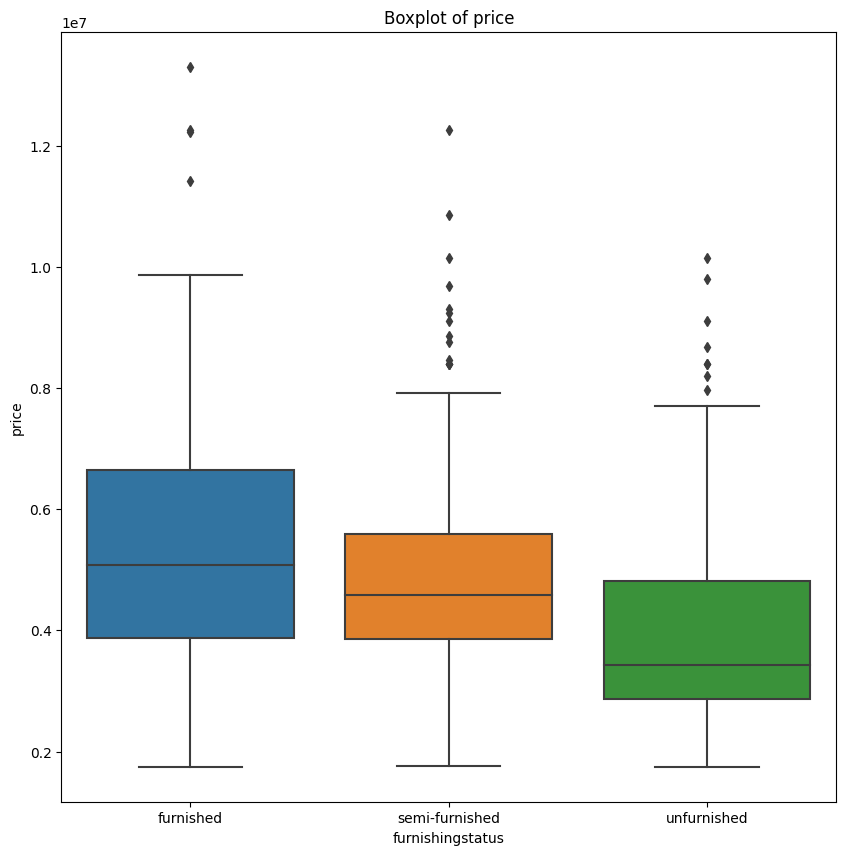

In [8]:
def boxplot(name: str) -> None:
    plt.figure(figsize=(10, 10))  # Create a new figure with a specified size
    # Create a boxplot using seaborn, where the x-axis represents 'furnishingstatus' and the y-axis represents the specified column 'name'
    sns.boxplot(data=df, x="furnishingstatus", y=name)
    plt.title(f"Boxplot of {name}")
    plt.show()  # Display the plot


# Identify numerical columns with data type 'int64' in the DataFrame
numberial_columns = df.columns[df.dtypes == "int64"]
boxplot(numberial_columns[0])

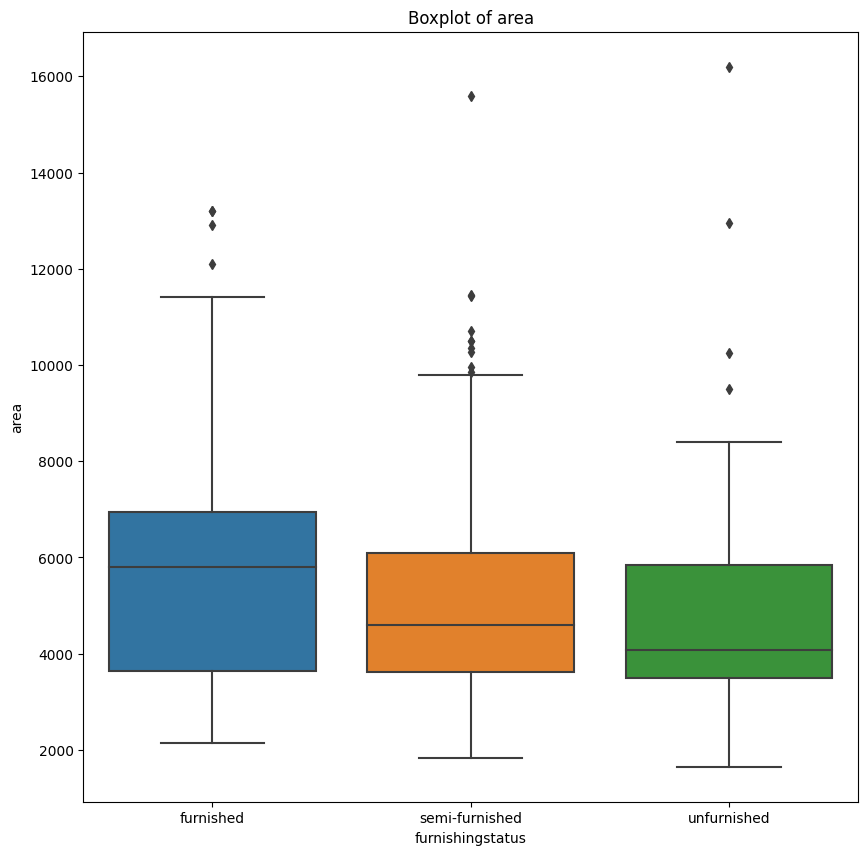

In [9]:
boxplot(numberial_columns[1])

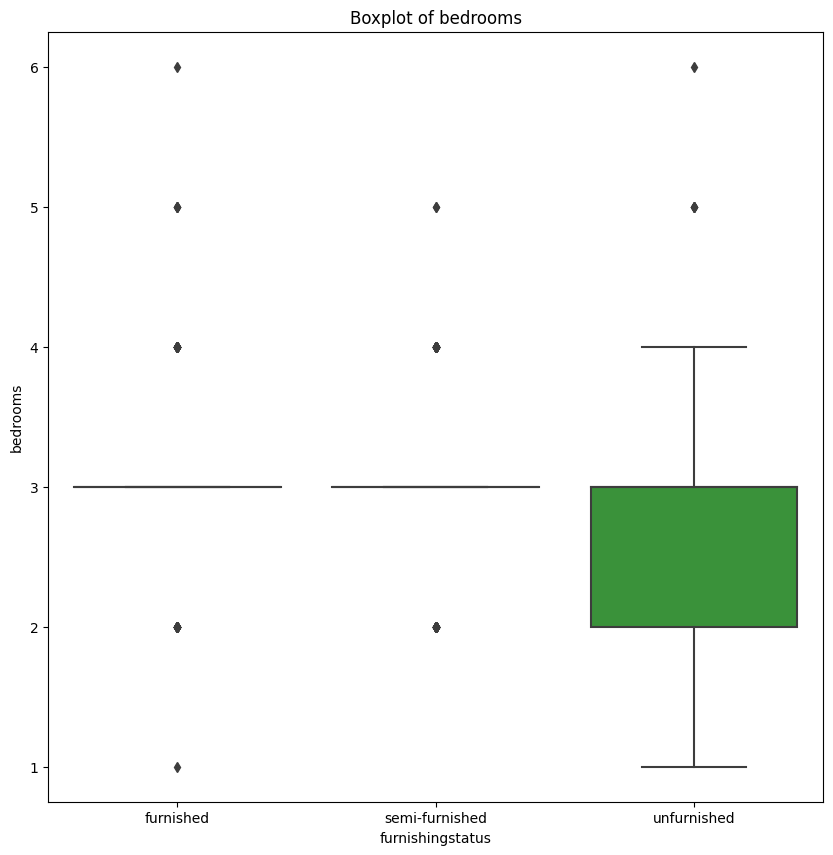

In [10]:
boxplot(numberial_columns[2])

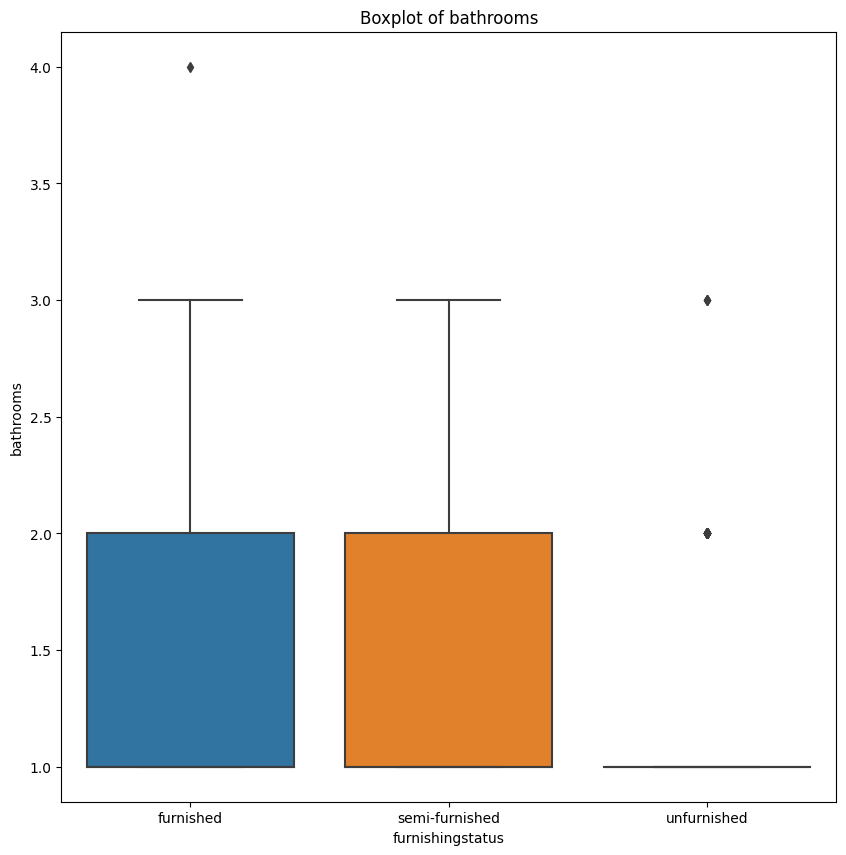

In [11]:
boxplot(numberial_columns[3])

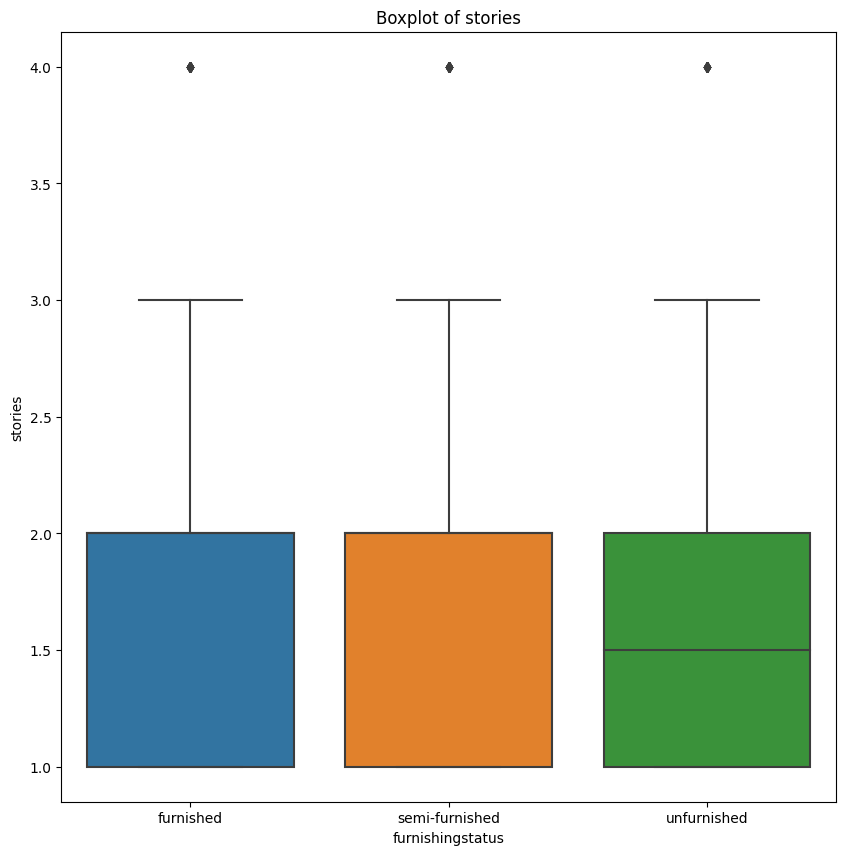

In [12]:
boxplot(numberial_columns[4])

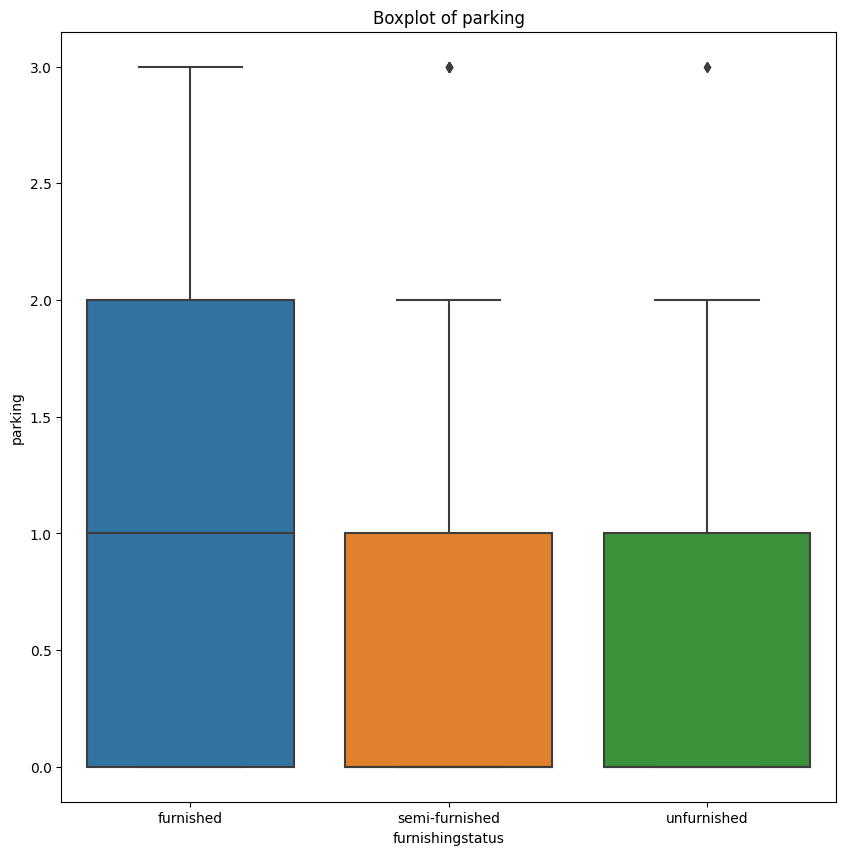

In [13]:
boxplot(numberial_columns[5])

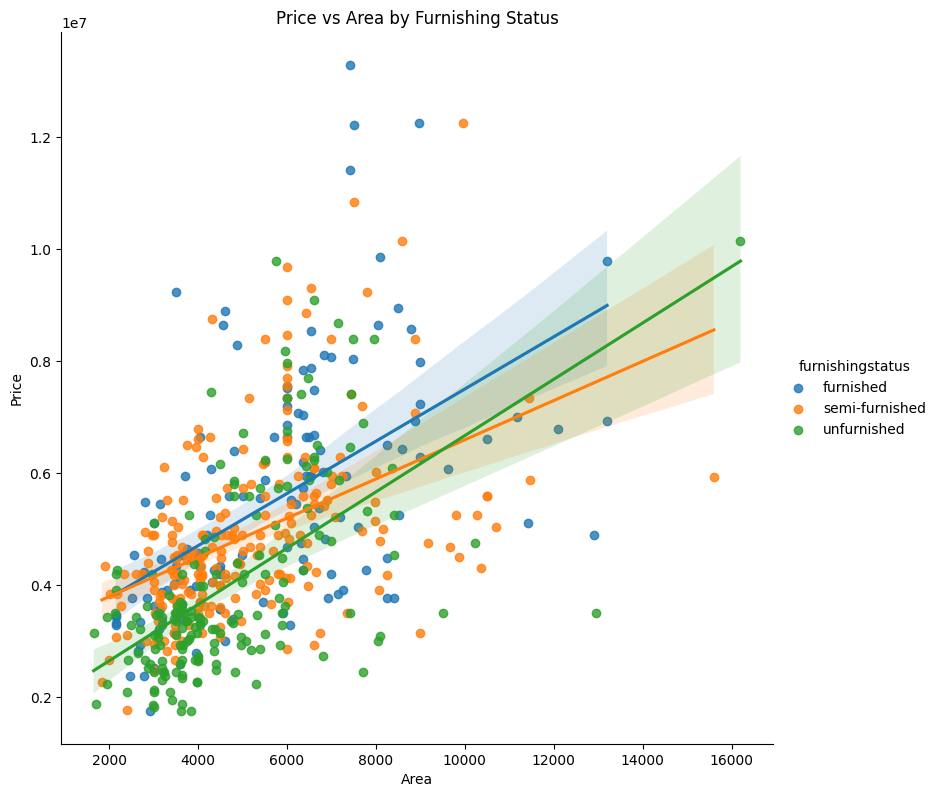

In [14]:
# create a scatter plot with a linear regression line (lmplot)
# x-axis: 'area', y-axis: 'price', and different colors for each 'furnishingstatus' group
sns.lmplot(x="area", y="price", hue="furnishingstatus", data=df, height=8)

# set the title of the plot
plt.title("Price vs Area by Furnishing Status")

# label the x-axis and y-axis
plt.xlabel("Area")
plt.ylabel("Price")

# display the plot
plt.show()